In [562]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

In [563]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import date, timedelta
import numpy as np
import random
import pickle
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.mode.chained_assignment = None  # default='warn'

np.set_printoptions(precision=5)

In [597]:
my_data=pd.read_csv('RefinedDataAll.csv')


In [598]:
#index criteria enter
daily_index=my_data[my_data['CODE']==1321]
daily_index=daily_index.set_index(['DATE'])
daily_index=daily_index[['MC','MO','NC','NO']]
my_data=my_data.set_index(['DATE'])
my_data=my_data.join(daily_index,rsuffix="_INDEX")
my_data=my_data.reset_index()
my_data=my_data.set_index(['PREVIOUS_DAY'])
my_data=my_data.join(daily_index,rsuffix="_PREV_INDEX")
my_data=my_data.reset_index()

my_data=my_data.set_index(['NEXT_DAY'])
my_data=my_data.join(daily_index,rsuffix="_NEXT_INDEX")
my_data=my_data.reset_index()

In [599]:
#insert shortables
fid = open('Shortable.txt','r')
read_list=[]
for line in fid:
    line=line.replace('\n','')
    read_list.append([int(line.split('|')[0]),int(line.split('|')[1])])
short_df=pd.DataFrame(read_list,columns=['CODE','SHORTABLE'])
short_df=short_df.set_index(short_df['CODE'])
short_df=short_df.drop(['CODE'],axis=1)
my_data=my_data.set_index(my_data['CODE'])
my_data=my_data.drop(['CODE'],axis=1)
my_data=my_data.join(short_df)

my_data=my_data.reset_index()
print(my_data.columns)

Index(['CODE', 'level_0', 'index', 'DATE', 'Unnamed: 0', 'Unnamed: 0.1', 'MC',
       'MH', 'ML', 'MO', 'NC', 'NET_CHANGE', 'NH', 'NL', 'NO', 'SQ', 'UNIT',
       'VALUE', 'VOLUME', 'VWAP', 'SQTYPE', 'MO_NEXTDAY', 'MH_NEXTDAY',
       'MC_NEXTDAY', 'ML_NEXTDAY', 'NO_NEXTDAY', 'NL_NEXTDAY', 'NC_NEXTDAY',
       'NH_NEXTDAY', 'NC_LASTDAY', 'DAILY_LIMIT', 'LIMIT_UP', 'LIMIT_DOWN',
       'OPEN_LU', 'OPEN_LD', 'MORNING_LU', 'MORNING_LD', 'NIGHT_LU',
       'NIGHT_LD', 'VALUE_AUD_MEAN', 'SUM_LIMIT', 'LIMIT_CLASS', 'LIMIT_U',
       'LIMIT_D', 'LIMIT_STATUS', 'DELTA_OPEN', 'DELTA_CLOSE',
       'DELTA_OPEN_CLASS', 'DELTA_CLOSE_CLASS', 'APP_LIMIT', 'DELTA_OPEN_P',
       'DELTA_CLOSE_P', 'MC_INDEX', 'MO_INDEX', 'NC_INDEX', 'NO_INDEX',
       'MC_PREV_INDEX', 'MO_PREV_INDEX', 'NC_PREV_INDEX', 'NO_PREV_INDEX',
       'MC_NEXT_INDEX', 'MO_NEXT_INDEX', 'NC_NEXT_INDEX', 'NO_NEXT_INDEX',
       'SHORTABLE'],
      dtype='object')


In [654]:
my_data_n=my_data.copy()
my_data_n=my_data_n[my_data_n['UNIT']==100]
my_data_n=my_data_n[my_data_n['SHORTABLE']==1]
my_data_n=my_data_n[my_data_n['SUM_LIMIT']<1]
my_data_n['Index_LClose_MorningClose']=(my_data_n['MC_INDEX']-my_data_n['NC_PREV_INDEX'])/my_data_n['NC_PREV_INDEX']
my_data_n['Index_Open_MorningClose']=(my_data_n['MC_INDEX']-my_data_n['MO_INDEX'])/my_data_n['MO_INDEX']
my_data_n['Index_Open_NightClose']=(my_data_n['NC_INDEX']-my_data_n['MO_INDEX'])/my_data_n['MO_INDEX']
my_data_n['Index_N_N']=(my_data_n['NC_INDEX']-my_data_n['NC_PREV_INDEX'])/my_data_n['NC_PREV_INDEX']

my_data_n['IndexReturn1']=(my_data_n['NC_NEXT_INDEX']-my_data_n['NC_INDEX'])/my_data_n['NC_INDEX']
my_data_n['IndexReturn2']=(my_data_n['NC_NEXT_INDEX']-my_data_n['MO_NEXT_INDEX'])/my_data_n['MO_NEXT_INDEX']
my_data_n['IndexReturn3']=(my_data_n['MO_NEXT_INDEX']-my_data_n['NC_INDEX'])/my_data_n['NC_INDEX']
my_data_n['IndexReturn4']=(my_data_n['MC_NEXT_INDEX']-my_data_n['NC_INDEX'])/my_data_n['NC_INDEX']
my_data_n['IndexReturn5']=(my_data_n['MC_NEXT_INDEX']-my_data_n['MO_NEXT_INDEX'])/my_data_n['MO_NEXT_INDEX']


my_data_n['StockReturn1']=(my_data_n['NC']-my_data_n['NC_LASTDAY'])/my_data_n['NC_LASTDAY']

my_data_n['VWAPvsClose']=(my_data_n['VWAP']-my_data_n['NC'])/my_data_n['NC']
my_data_n['MOpenvsClose']=(my_data_n['MC_NEXTDAY']-my_data_n['NC'])/my_data_n['NC']
my_data_n['NOpenvsClose']=(my_data_n['NC_NEXTDAY']-my_data_n['NC'])/my_data_n['NC']
my_data_n['MOpenvsClose1']=(my_data_n['MC_NEXTDAY']-my_data_n['MO_NEXTDAY'])/my_data_n['MO_NEXTDAY']
my_data_n['NOpenvsClose1']=(my_data_n['NC_NEXTDAY']-my_data_n['MO_NEXTDAY'])/my_data_n['MO_NEXTDAY']
my_data_n['NOpenvsMOpen']=(my_data_n['MO_NEXTDAY']-my_data_n['NC'])/my_data_n['NC']

In [655]:
#strategy parameters
quantile_list=[5,10,15,20,25,30,50]#ok
filter_list=[0.5,1,5,10] # ok
strategy_index=['LC_MC','IO_MC','IO_NC','NO']#ok
strategy_measure=['NC','MC',"O"]#ok
strategy_open_time=['O','N']#ok
strategy_type=['HEDGED','UNHEDGED']#ok
index_filter=[0,0.01/2]#ok
weighted=["Vol","NAN"]
stock_momentum=["LC_MC","NO"]



****************************************************************************************************
Quantile: 100  Filter m: 5  Index Type: LC_MC  Type: HEDGED  Measure(When to Close): MC  Open Time: N  Index Filter: 0  Top Filter: 10  Weighted NAN Stock Momentum:  NO  Stock Momentum Filter: 0.02
LEN LIST OF STOCKS 1280
[4097, 8194, 4099, 4100, 2053, 6151, 8200, 8202, 8203, 2060, 6157, 4112, 4116, 6165, 8214, 6167, 4120, 8217, 6175, 6187, 8237, 6192, 6196, 8244, 6199, 6203, 2108, 2109, 6205, 8251, 2112, 6208, 6210, 8255, 8260, 2117, 6217, 6218, 2130, 8275, 8276, 8278, 8279, 8281, 2138, 4187, 6237, 6238, 8285, 8289, 8291, 6245, 6246, 6247, 6250, 6255, 6257, 2162, 4212, 6262, 4215, 4216, 2169, 4218, 6264, 4220, 2173, 2174, 4221, 6266, 6272, 6274, 4228, 4229, 6277, 4231, 6278, 6279, 6282, 6284, 4237, 6287, 8336, 8337, 8338, 4245, 2198, 4246, 4248, 4249, 6293, 6294, 2204, 6297, 6298, 6299, 8343, 8344, 6306, 2211, 8349, 8350, 6310, 8356, 2216, 2217, 8360, 8361, 2220, 6316, 6317, 8362, 8363

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:184: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:192: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Basis Point Long: 140.992614352692 Basis Point Short: 106.80759740114182
Trades Long: 776 Trades Short:  656
Long Win Rate 0.551829268292683
Short Win Rate 0.6121134020618557


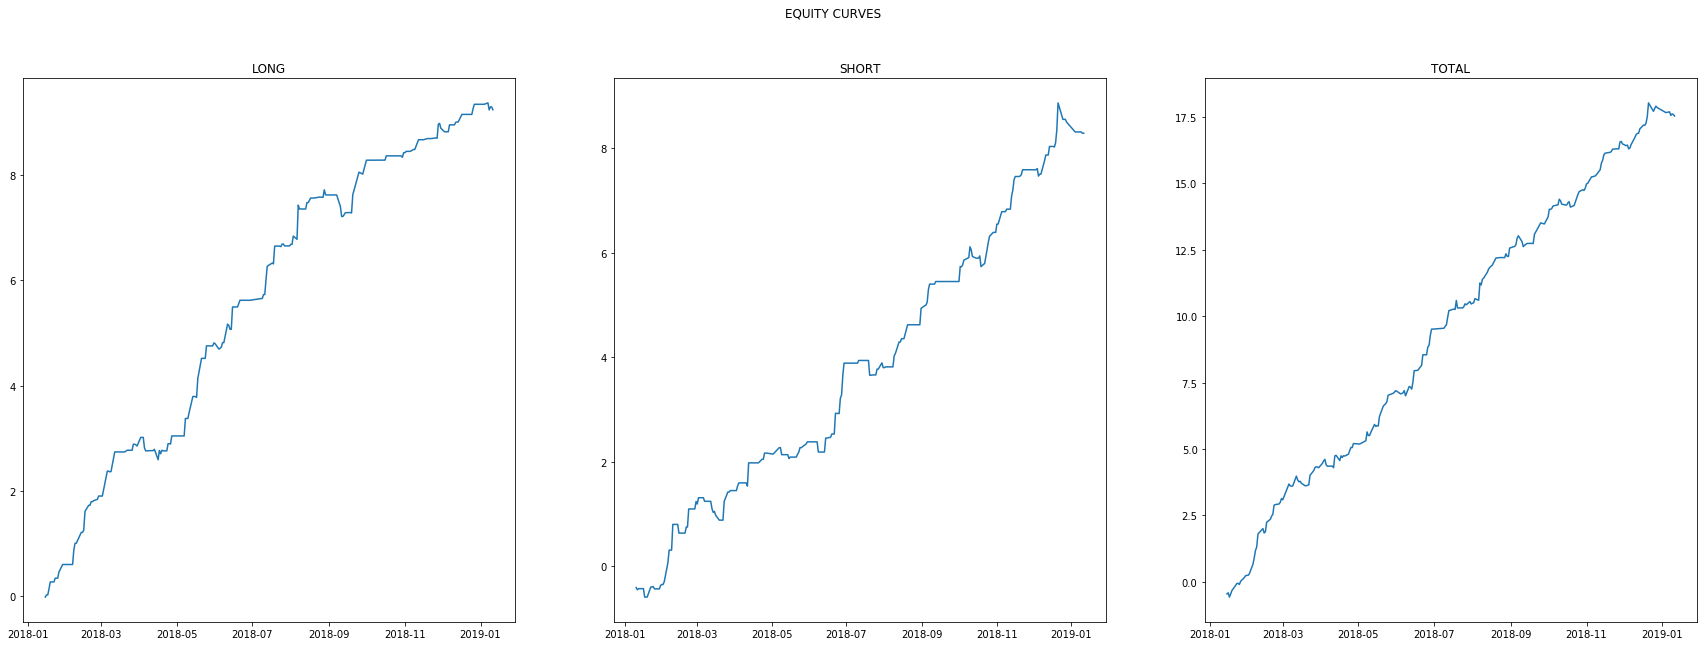

In [669]:

def generate_strategy(my_df,quantile,filter_value,index,stype,measure,open_time,index_filter,top_filter,weighted,stock_momentum,stock_momentum_filter):
    print("*"*100)
    print("Quantile:",quantile," Filter m:",filter_value," Index Type:",index," Type:",stype," Measure(When to Close):",
          measure," Open Time:",open_time, " Index Filter:", index_filter," Top Filter:", top_filter," Weighted",
          weighted,"Stock Momentum: ",stock_momentum," Stock Momentum Filter:",stock_momentum_filter)
    
    my_df=my_df[(my_df['VALUE_AUD_MEAN']<filter_value*1000000)] 
    my_df=my_df[(my_df['VALUE_AUD_MEAN']>100000)]
    print("LEN LIST OF STOCKS",len(list(set(list(my_df["CODE"])))))
    my_stock_list=list(set(list(my_df["CODE"])))
    print(my_stock_list)
    my_df['VWAPQ']=pd.qcut(my_df['VWAPvsClose'].rank(method='first'),quantile,labels=[x for x in range(quantile)],duplicates='raise')
    pickle.dump(my_stock_list,open('stock_list.pick','wb'))

    #print("TOP Quantile Range: ",my_df[my_df["VWAPQ"]==quantile-1])
    print("BOTTOM Quantile Range: MAX:",np.max(my_df[my_df["VWAPQ"]==0]["VWAPvsClose"]),"MIN: ",np.min(my_df[my_df["VWAPQ"]==0]["VWAPvsClose"]))
    print("TOP Quantile Range: MAX:",np.max(my_df[my_df["VWAPQ"]==(quantile-1)]["VWAPvsClose"]),"MIN: ",np.min(my_df[my_df["VWAPQ"]==(quantile-1)]["VWAPvsClose"]))
    if open_time=='N' and measure=='MC':
        select="MOpenvsClose"
    elif open_time=='N' and measure=='NC':
        select="NOpenvsClose"
    elif open_time=='O' and measure=='MC':
        select="MOpenvsClose1"
    elif open_time=='O' and measure=='NC':
        select="NOpenvsClose1"
    elif open_time=='N' and measure=='O':
        select="NOpenvsMOpen"
    elif open_time=='O' and measure=='O':
        raise Exception("Impossible") 
    else:
        raise Exception("Undefined")
    my_df['OCQ']=pd.qcut(my_df[str(select)].rank(method='first'),quantile,labels=[x for x in range(quantile)],duplicates='raise')
    
    if stock_momentum=="NO":
        my_df['MomentFilter_Long']=1
        my_df['MomentFilter_Short']=1       
    else:
        my_df['MomentFilter_Long']=0
        my_df['MomentFilter_Short']=0
        if stock_momentum=="LC_MC":
            m_select="StockReturn1"
        else:
            raise Exception("Undefined")
        my_df['MomentFilter_Long']=np.where(my_df[str(m_select)]<stock_momentum_filter*-1,1,my_df['MomentFilter_Long'])
        my_df['MomentFilter_Short']=np.where(my_df[str(m_select)]>stock_momentum_filter,1,my_df['MomentFilter_Short'])
        plt.title("MOMENTUM vs VWAPQ")
        plt.scatter(my_df[str(m_select)],my_df['VWAPQ'])
        plt.show()
    if index=="NO":
        my_df['IndexFilter_Long']=1
        my_df['IndexFilter_Short']=1
    else:
        my_df['IndexFilter_Long']=0
        my_df['IndexFilter_Short']=0
        if index=="LC_MC":
            f_select="Index_LClose_MorningClose"
        elif index=="IO_MC":
            f_select="Index_Open_MorningClose"
        elif index=="IO_NC":
            f_select="Index_Open_NightClose"  
        elif index=="N_N":
            f_select="Index_N_N" 
        else:
            raise Exception("Undefined")

        my_df['IndexFilter_Long']=np.where(my_df[str(f_select)]>index_filter,1,my_df['IndexFilter_Long'])
        my_df['IndexFilter_Short']=np.where(my_df[str(f_select)]<index_filter*-1,1,my_df['IndexFilter_Short'])
    my_df["IndexReturn"]=0
  
    if open_time=="O":
        if measure=="NC":
            my_df["IndexReturn"]=my_df["IndexReturn2"]
        elif measure=="O":
            raise Exception("Impossible")  
        elif measure=="MC":
            my_df["IndexReturn"]=my_df["IndexReturn5"]
        else:
            raise Exception("Undefined")           
            
    elif open_time=="N":
        if measure=="NC":
            my_df["IndexReturn"]=my_df["IndexReturn1"]      
        elif measure=="O":
            my_df["IndexReturn"]=my_df["IndexReturn3"] 
        elif measure=="MC":
            my_df["IndexReturn"]=my_df["IndexReturn4"]     
        else:
            raise Exception("Undefined")
    else:
        raise Exception("Undefined")
    #now create strategy long and short frames
    long_frame=my_df[(my_df['VWAPQ']==(quantile-1)) ]
    long_frame=long_frame.set_index(long_frame['DATE'])
    long_frame=long_frame[long_frame['IndexFilter_Long']==1]
    long_frame=long_frame[long_frame['MomentFilter_Long']==1]    
    if stype=="UNHEDGED":
        long_frame['RETURN']=long_frame[str(select)]
    elif stype=="HEDGED":
        long_frame['RETURN']=long_frame[str(select)]-long_frame["IndexReturn"]
    else:
        raise Exception("Undefined")

    short_frame=my_df[(my_df['VWAPQ']==0) ]
    short_frame=short_frame.set_index(short_frame['DATE']) 
    short_frame[str(select)]=short_frame[str(select)]*-1
    short_frame=short_frame[short_frame['IndexFilter_Short']==1]
    short_frame=short_frame[short_frame['MomentFilter_Short']==1]
    if stype=="UNHEDGED":
        short_frame['RETURN']=short_frame[str(select)]
    elif stype=="HEDGED":
        short_frame['RETURN']=short_frame[str(select)]+short_frame["IndexReturn"]    
    
    long_frame=add_rank_filter(long_frame,"Long",top_filter)
    short_frame=add_rank_filter(short_frame,"Short",top_filter)
    
    #plt.scatter(long_frame[])
    
    if weighted=="Vol":
        long_frame['RETURN']=long_frame['RETURN']*long_frame['WEIGHTED_VOL']
        short_frame['RETURN']=short_frame['RETURN']*short_frame['WEIGHTED_VOL']
        long_ret=long_frame['RETURN'].dropna()
        short_ret=short_frame['RETURN'].dropna()      
    elif weighted=="Inv":
        long_frame['RETURN']=long_frame['RETURN']*(1-long_frame['WEIGHTED_VOL'])
        short_frame['RETURN']=short_frame['RETURN']*(1-short_frame['WEIGHTED_VOL'])
        long_ret=long_frame['RETURN'].dropna()
        short_ret=short_frame['RETURN'].dropna()   
    elif weighted=="NAN":
        long_ret=long_frame['RETURN'].dropna()
        short_ret=short_frame['RETURN'].dropna()
    else:
        raise Exception("Undefined")
    
    long_daily=long_ret.groupby(long_ret.index).sum().sort_index()
    long_equity=long_daily.cumsum()
    
    short_daily=short_ret.groupby(short_ret.index).sum().sort_index()
  #  print(short_ret.groupby(short_ret.index).count().sort_index())

    short_equity=short_daily.cumsum()
    print("Basis Point Long:",long_ret.mean()*10000,"Basis Point Short:",short_ret.mean()*10000)
    print("Trades Long:",len(short_ret),"Trades Short: ",len(long_ret))
    print("Long Win Rate",(len(long_ret[long_ret>0])/len(long_ret)))
    print("Short Win Rate",(len(short_ret[short_ret>0])/len(short_ret)))
    #print(long_ret.groupby(long_ret.index).nlargest(3))
    my_date_all=list(set(list(list(long_equity.index)+list(short_equity.index))))
    
    result_frame=pd.DataFrame(index=my_date_all)
    result_frame.index=pd.to_datetime(result_frame.index)
    result_frame=result_frame.join(long_equity,rsuffix="LONG")
    result_frame=result_frame.sort_index()
    result_frame=result_frame.join(short_equity,rsuffix="SHORT")
    result_frame=result_frame.sort_index()
    result_frame=result_frame.fillna(method='ffill')

    result_frame["TOTAL"]=result_frame["RETURN"]+result_frame["RETURNSHORT"]

 
    plt.figure(figsize=(30,10))
    
    plt.suptitle("EQUITY CURVES")
    plt.subplot("131")
    plt.title("LONG")
    plt.plot(result_frame["RETURN"])
    plt.subplot("132")
    plt.title("SHORT")
    plt.plot(result_frame["RETURNSHORT"])
    plt.subplot("133")
    plt.title("TOTAL")
    plt.plot(result_frame["TOTAL"])
    plt.show()
    
def add_rank_filter(dataframe,long_short,filter_value):

    dataframe=dataframe.reset_index(drop=True)
    my_frame=pd.DataFrame(columns=dataframe.columns)
    if long_short=="Long":
        for date in (list(set(list(dataframe["DATE"])))):
            filtered_frame=dataframe[dataframe["DATE"]==date].sort_values(['VWAPvsClose'],ascending=False).iloc[:filter_value,:]
            filtered_frame["WEIGHTED_VOL"]=(filtered_frame["VALUE_AUD_MEAN"].apply(lambda x: x/filtered_frame["VALUE_AUD_MEAN"].sum()))

     
            my_frame=pd.concat([my_frame,filtered_frame])


    
    elif long_short == "Short":
        for date in (list(set(list(dataframe["DATE"])))):       
            filtered_frame=dataframe[dataframe["DATE"]==date].sort_values(['VWAPvsClose'],ascending=False).iloc[-filter_value:,:]
            filtered_frame["WEIGHTED_VOL"]=(filtered_frame["VALUE_AUD_MEAN"].apply(lambda x: x/filtered_frame["VALUE_AUD_MEAN"].sum()))
            my_frame=pd.concat([my_frame,filtered_frame])
    
    else:
        raise Exception("Undefined")
    my_frame=my_frame.set_index(['DATE'])

    return my_frame
        
    
    
    
generate_strategy(my_df=my_data_n,quantile=100,filter_value=5,index='LC_MC',stype='HEDGED',measure='MC',open_time='N',index_filter=0,top_filter=10,weighted="NAN",stock_momentum="NO",stock_momentum_filter=0.02)

NameError: name 'filtered_frame' is not defined

In [ ]:
long_frame=my_data[(my_data['VWAPQ']==29) ]
long_frame=long_frame.set_index(long_frame['DATE'])

short_frame=my_data[(my_data['VWAPQ']==0) ]
short_frame=short_frame.set_index(short_frame['DATE'])
short_frame['OpenvsClose']=short_frame['OpenvsClose']*-1

In [ ]:
a=short_frame['OpenvsClose'].dropna()
b=long_frame['OpenvsClose'].dropna()

In [ ]:
#short,long,combined,
#basis point profit,trades,long trades, short trades, sharpe,rsq,sharepe long,sharpe short, rsq long, rsq short, max dd ,max_dd_long, max_dd_short, equity_curve_long,equity_curve_short,equoty_curve_combined

In [136]:
a.mean()*10000

40.967740686674844

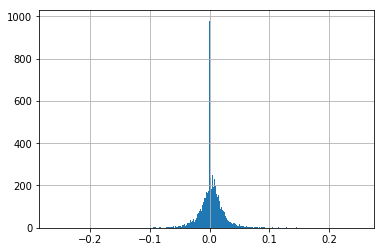

In [109]:
a.hist(bins=1000)
plt.show()

In [ ]:
aa=a.groupby(a.index).sum()
aa.cumsum().plot()
plt.show()

In [113]:
b.sort_values()

DATE
2018-04-10   -0.24088
2018-11-14   -0.17902
2018-07-10   -0.17599
2018-07-02   -0.16436
2018-02-05   -0.15985
2018-05-25   -0.15747
2018-02-05   -0.15454
2018-12-20   -0.14983
2018-02-07   -0.14809
2018-12-20   -0.14344
2018-12-21   -0.14286
2018-12-13   -0.14192
2018-12-20   -0.14018
2018-12-21   -0.13333
2018-12-21   -0.13321
2018-02-05   -0.13317
2018-12-21   -0.13214
2018-12-21   -0.13000
2018-02-05   -0.12994
2018-10-25   -0.12908
2018-12-21   -0.12874
2018-12-21   -0.12821
2018-10-31   -0.12806
2018-12-20   -0.12787
2018-12-21   -0.12756
2018-12-21   -0.12741
2018-12-21   -0.12621
2018-07-09   -0.12489
2018-07-10   -0.11894
2018-01-31   -0.11874
               ...   
2019-01-10    0.29231
2018-05-18    0.33333
2018-03-15    0.33333
2018-02-16    0.33333
2018-03-20    0.33333
2018-03-28    0.33333
2018-04-27    0.33333
2018-05-08    0.33333
2018-05-14    0.33333
2018-03-06    0.33333
2018-03-12    0.33333
2018-06-15    0.33333
2018-05-24    0.33333
2018-10-03    0.33333
2018-

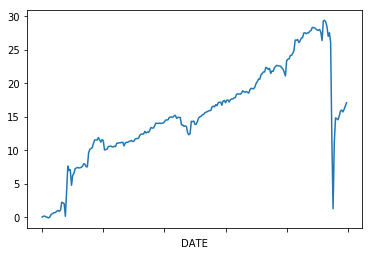

In [133]:
bb=b.groupby(b.index).sum()
bb.cumsum().plot()
plt.show()

In [138]:
zzzzz=long_frame[long_frame.index=='2018-12-20']
zzzzz.to_csv('look.csv')


In [71]:
for x in range(10):
    print(np.quantile(my_data['NC'].dropna(),0.1*x))
    

3.0
387.0
609.0
822.0
1023.0
1263.0
1581.0
1950.0
2440.0
3290.0


In [134]:
bb

DATE
2018-01-09     0.05169
2018-01-10     0.10782
2018-01-11     0.04775
2018-01-12    -0.11966
2018-01-15    -0.04720
2018-01-16    -0.11661
2018-01-17     0.07561
2018-01-18     0.36017
2018-01-19     0.14843
2018-01-22     0.11879
2018-01-23     0.09403
2018-01-24     0.02212
2018-01-25     0.19737
2018-01-26     0.09046
2018-01-29    -0.11723
2018-01-30     0.17909
2018-01-31     1.17059
2018-02-01    -0.09284
2018-02-02    -0.12020
2018-02-05    -1.87991
2018-02-06     3.88321
2018-02-07     3.61313
2018-02-08    -0.66258
2018-02-09     0.12551
2018-02-13    -2.33138
2018-02-14     1.49057
2018-02-15     0.30494
2018-02-16     0.67061
2018-02-19     0.12189
2018-02-20     0.07890
                ...   
2018-11-27     0.09950
2018-11-28     0.46066
2018-11-29    -0.02741
2018-11-30    -0.04806
2018-12-03    -0.15799
2018-12-04    -0.17534
2018-12-05    -0.01952
2018-12-06     0.12805
2018-12-07    -0.45603
2018-12-10    -1.20797
2018-12-11     2.89982
2018-12-12     0.13270
2018-1

In [135]:
b

DATE
2018-02-06    0.06394
2018-02-07    0.01980
2018-02-23    0.01481
2018-04-10    0.04587
2018-04-27    0.00000
2018-05-21    0.02079
2018-06-14   -0.00230
2018-10-26   -0.03955
2018-02-14    0.02381
2018-03-22   -0.03101
2018-04-11    0.01681
2018-05-28    0.00813
2018-07-19   -0.00813
2018-07-20   -0.00826
2018-10-02    0.00000
2018-10-23    0.00847
2018-11-15    0.03333
2018-12-25    0.00909
2018-01-09    0.00463
2018-02-07    0.00463
2018-03-08    0.00926
2018-03-29    0.01914
2018-05-29   -0.01648
2018-06-06    0.00000
2018-08-22    0.01818
2018-09-10    0.00606
2018-10-11    0.00000
2018-12-04   -0.01449
2018-12-21   -0.02083
2018-12-25    0.02703
               ...   
2018-12-14   -0.01163
2018-12-17    0.00000
2018-12-18   -0.03205
2018-12-19   -0.02000
2018-12-20   -0.09028
2018-12-21    0.09701
2018-12-25   -0.02797
2018-12-26    0.04348
2018-12-27   -0.09220
2018-12-28   -0.03876
2019-01-15    0.28111
2018-12-20   -0.05638
2018-03-09    0.01158
2018-07-10    0.00747
2018-